# Introduction to Neural Networks 


** Ecole Centrale Nantes **

** Diana Mateus **


** Participants : **



## General description
In this lab we will create a simple classifier based on neural networks. We will progress in two parts:
- In the first part, and to better understand the involved operations, we will create a single-neuron model and optimize its parameters "by hand". For this first part we will only use the **Numpy** library
- We will then build a multi-layer perceptron with the built-in library **Keras** module and **tensorflow**. Tensorflow is already installed in the university computers. If using your own computer you should have already installed **tensorflow** or use **collab** online platform.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

### Loading the dataset
Start by runing the following lines to load and visualize the data.

In [2]:
def load_dataset():
    train_dataset = h5py.File('dataset/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) 
    train_y = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) 
    test_y = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

#### Visualize data

Train X shape: (209, 64, 64, 3)
Train Y shape: (1, 209)
Test X shape: (50, 64, 64, 3)
Test Y shape: (1, 50)


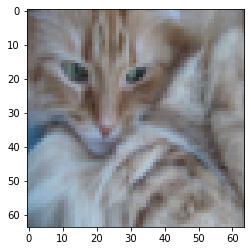

In [3]:
train_x, train_y, test_x, test_y, classes = load_dataset()

print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

index = 2
plt.imshow(train_x[index])

#### Preprocessing
In the following lines we vectorize the images (Instead of a 2-D image we will give as input to the models a 1-D vector). The normalization makes the image intensities be between 0 and 1, and converts the images to floats.

In [4]:
train_x = train_x.reshape(train_x.shape[0], -1).T
test_x = test_x.reshape(test_x.shape[0], -1).T

print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Train X shape: (12288, 209)
Train Y shape: (1, 209)
Test X shape: (12288, 50)
Test Y shape: (1, 50)


In [5]:
train_x = train_x/255.
test_x = test_x/255.

### 1. Classification with a single neuron 


**a)** Fill-in the following three functions to define the single neuron model:
- A function **initialize_parameters** that randomly initializes the model's weights with small values. The number of the weights corresponds to the dimension of the input (size of the image)
- A function **sigmoid** that computes the sigmoid activation function
- A function **neuron** that given an input vector, weights and biases computes the output of the single neuron model

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def initialize_parameters(dim):
    w = np.random.randn(dim, 1)*0.01
    b = 0
    return w, b

In [8]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    #calculate activation function
    A = sigmoid(np.dot(w.T, X)+b)    #find the cost
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  
    #find gradient (back propagation)
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)    
    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db} 
    return grads, cost

w,b = initialize_parameters (train_x.shape[0])
gr,cos = propagate (w,b,train_x, train_y)
print(w)
print (b)
print (gr)
print (cos)

[[ 0.00737426]
 [-0.0043893 ]
 [ 0.00746223]
 ...
 [-0.01431221]
 [ 0.00530244]
 [ 0.00621261]]
0
{'dw': array([[0.09240049],
       [0.10899584],
       [0.09176042],
       ...,
       [0.09237473],
       [0.10434907],
       [0.06852574]]), 'db': 0.2624457073751033}
0.7759673299484603


**b)** **Forward Pass:**
Use the three functions above to compute a first forward pass for the input matrix $X$ containing the loaded dataset, for some initialization of the weights and bias.
 
 \begin{align}
 Y_{\rm pred}=\sigma(w^\top X+b) = [y_{\rm pred}^{(1)},y_{\rm pred}^{(2)},\dots,y_{\rm pred}^{(m)}]
 \end{align}
 

In [9]:
def gradient_descent(w, b, X, Y, iterations, learning_rate):
    costs = []
    for i in range(iterations):
        grads, cost = propagate(w, b, X, Y)
        
        #update parameters
        w = w - learning_rate * grads["dw"]
        b = b - learning_rate * grads["db"]
        costs.append(cost)
        if i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}    
    return params, costs

**f) Prediction**
Use the optimized parameters to make predictions both for the train and test sets and compute the accuracy for each. What do you observe?

In [10]:
def predict(w, b, X):    
    # number of example
    m = X.shape[1]
    y_pred = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        y_pred[0,i] = 1 if A[0,i] >0.5 else 0 
        pass
    return y_pred
    

**g) Early stopping** 
- Adapt the gradient descent function to consider part (a percentage) of the training data for validation. Use the validation set to choose the training hyperparameters (learning_rate, iterations). 
- Plot the training and validation curves
- Report again the training and test accuracy and loss for the new trained model
- What do you observe



In [11]:
def model(train_x, train_y, test_x, test_y, iterations, learning_rate):
    w, b = initialize_parameters(train_x.shape[0])
    parameters, costs = gradient_descent(w, b, train_x, train_y, iterations, learning_rate)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # predict 
    train_pred_y = predict(w, b, train_x)
    test_pred_y = predict(w, b, test_x)    
    print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
    print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))
    
    return costs

In [12]:
costs = model(train_x, train_y, test_x, test_y, iterations = 2000, learning_rate = 0.005)

Cost after iteration 0: 0.785301
Cost after iteration 500: 0.302386
Cost after iteration 1000: 0.214233
Cost after iteration 1500: 0.166111
Train Acc: 99.04306220095694 %
Test Acc: 68.0 %


NameError: name 'd' is not defined

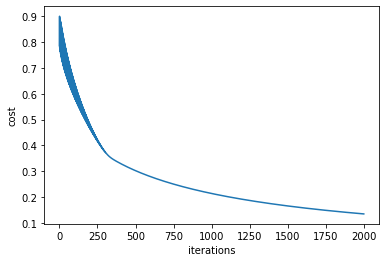

In [13]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

### 2. CNNs with Keras

Adapt the example in this website https://keras.io/examples/vision/mnist_convnet/ to our problem. To this end:
- change the number of classes and the input size
- remove the expand_dims(x_train, -1): it is not necessary to expand the dimensions since our input is 3-dimensional 
- you may need to transpose the labels vector
- change the categorical cross-entropy to the binary cross entropy given that our problem is binary classification. 
- also change the softmax to sigmoid, the more appropriate activation function for binary data

We can choose a single neuron output passed through sigmoid, and then set a threshold to choose the class, or use two neuron output and then perform a softmax.

**2.1** Can you get the accuracy better than in our hand single-neuron model?Try different configurations and explain the changes you have made.

**2.2** Compute the train and test loss and accuracy after the model has been trained.  What model parameters does the ``fit`` function retain?

**2.3** How many parameters does the network have, explain where the number comes from.

**2.4** What is the receptive field of the network https://distill.pub/2019/computing-receptive-fields/

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# the data, split between train and test sets
x_train, y_train, x_test, y_test, classes=load_dataset()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = y_train.T
y_test = y_test.T




In [ ]:
#build the model
model =
model.summary()

In [ ]:
#comiple and fit

In [ ]:
#evaluate


## BONUS: 
Replace the fit function by your own tensorflow  implementation

1. Instantiate one of keras.optimizers to train the model.

optimizer = 

2. Instantiate a loss from keras.losses

loss_fn = 

3. Prepare the metrics. Instatiate the metrics from keras.metrics

train_acc_metric =
val_acc_metric =

4. Stochastic Gradient Loop
    * Iterate over the dataset in batches with 
    * Open a GradientTape() scope 
    * Inside this scope call the model (forward pass)
    * Compute the loss outside the scope
    * Retrieve the weight gradients
    * Use the optimimzer to update the weights with the gradients

